# **VEGFR KINASE VIRTUAL DRUG SCREENING**

# **04 - Fingerprint Generation**

## Padel Descriptor

In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_2class[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1cccc(OC(F)(F)F)c1	CHEMBL2332869
O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1cccc(F)c1	CHEMBL2332868
O=C(Nc1ccc(Oc2ncnc3[nH]ncc23)cc1)Nc1ccc(N2CCOCC2)cc1	CHEMBL2332866
O=C(Nc1ccc(F)cc1)Nc1ccc(Oc2ncnc3[nH]ncc23)cc1	CHEMBL2332865
O=C(NCC1CCCCC1)Nc1ccc(Oc2ncnc3[nH]ncc23)cc1	CHEMBL2332864


In [ ]:
! cat molecule.smi | wc -l

728


In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL2332869 in molecule.smi (1/728). 
Processing CHEMBL2332868 in molecule.smi (2/728). 
Processing CHEMBL2332866 in molecule.smi (3/728). Average speed: 3.55 s/mol.
Processing CHEMBL2332865 in molecule.smi (4/728). Average speed: 1.81 s/mol.
Processing CHEMBL2332864 in molecule.smi (5/728). Average speed: 1.59 s/mol.
Processing CHEMBL2332863 in molecule.smi (6/728). Average speed: 1.22 s/mol.
Processing CHEMBL2332862 in molecule.smi (7/728). Average speed: 1.10 s/mol.
Processing CHEMBL2332861 in molecule.smi (8/728). Average speed: 0.93 s/mol.
Processing CHEMBL2332860 in molecule.smi (9/728). Average speed: 0.88 s/mol.
Processing CHEMBL2332859 in molecule.smi (10/728). Average speed: 0.78 s/mol.
Processing CHEMBL2332858 in molecule.smi (11/728). Average speed: 0.88 s/mol.
Processing CHEMBL2332857 in molecule.smi (12/728). Average speed: 0.75 s/mol.
Processing CHEMBL2332856 in molecule.smi (13/728). Average speed: 0.83 s/mol.
Processing CHEMBL2332855 in molecule.smi (14/72

### Menggabungkan Fingerprint dan dataframe class

In [ ]:
df_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
724,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
725,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
726,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_2class_prep = pd.read_csv('01_label2class_sars.csv')

In [ ]:
selection1= ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
df_Y = df_2class_prep [selection1]
df_Y

,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,4.75,430.35,4.69,3.00,6.00
1,4.78,364.34,3.93,3.00,5.00
2,4.00,431.46,3.63,3.00,7.00
3,4.05,364.34,3.93,3.00,5.00
4,4.00,366.43,3.85,3.00,5.00
...,...,...,...,...,...
723,7.31,475.86,5.31,4.00,6.00
724,6.46,459.41,4.80,4.00,6.00
725,7.30,407.87,4.29,4.00,6.00
726,7.28,388.44,4.14,2.00,8.00


In [ ]:
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,4.75,430.35,4.69,3.00,6.00
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,4.78,364.34,3.93,3.00,5.00
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,4.00,431.46,3.63,3.00,7.00
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,4.05,364.34,3.93,3.00,5.00
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,4.00,366.43,3.85,3.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,7.31,475.86,5.31,4.00,6.00
724,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,6.46,459.41,4.80,4.00,6.00
725,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,7.30,407.87,4.29,4.00,6.00
726,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,7.28,388.44,4.14,2.00,8.00


<Axes: >

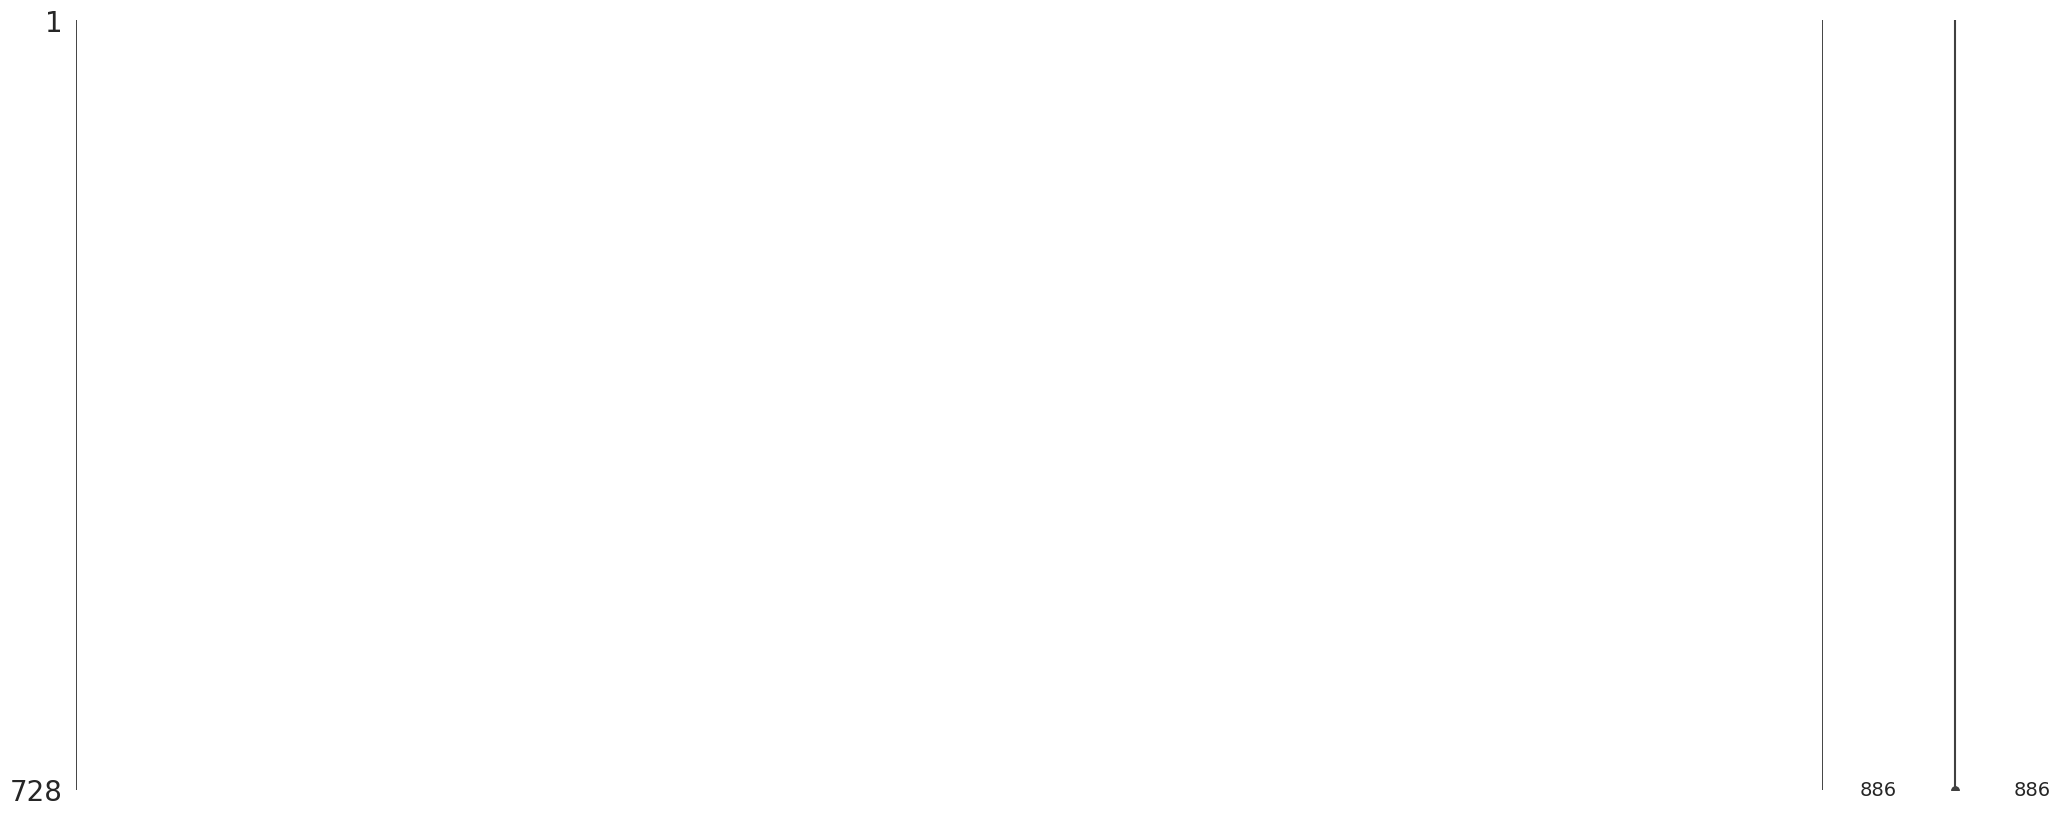

In [ ]:
msno.matrix(dataset)

In [ ]:
dataset.isna().sum()

,0
PubchemFP0,0
PubchemFP1,0
PubchemFP2,0
PubchemFP3,0
PubchemFP4,0
...,...
pIC50,0
MW,0
LogP,0
NumHDonors,0


In [ ]:
dataset=dataset.dropna()
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,4.75,430.35,4.69,3.00,6.00
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,4.78,364.34,3.93,3.00,5.00
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,4.00,431.46,3.63,3.00,7.00
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,4.05,364.34,3.93,3.00,5.00
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,4.00,366.43,3.85,3.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,7.31,475.86,5.31,4.00,6.00
724,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,6.46,459.41,4.80,4.00,6.00
725,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,7.30,407.87,4.29,4.00,6.00
726,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,7.28,388.44,4.14,2.00,8.00


<Axes: >

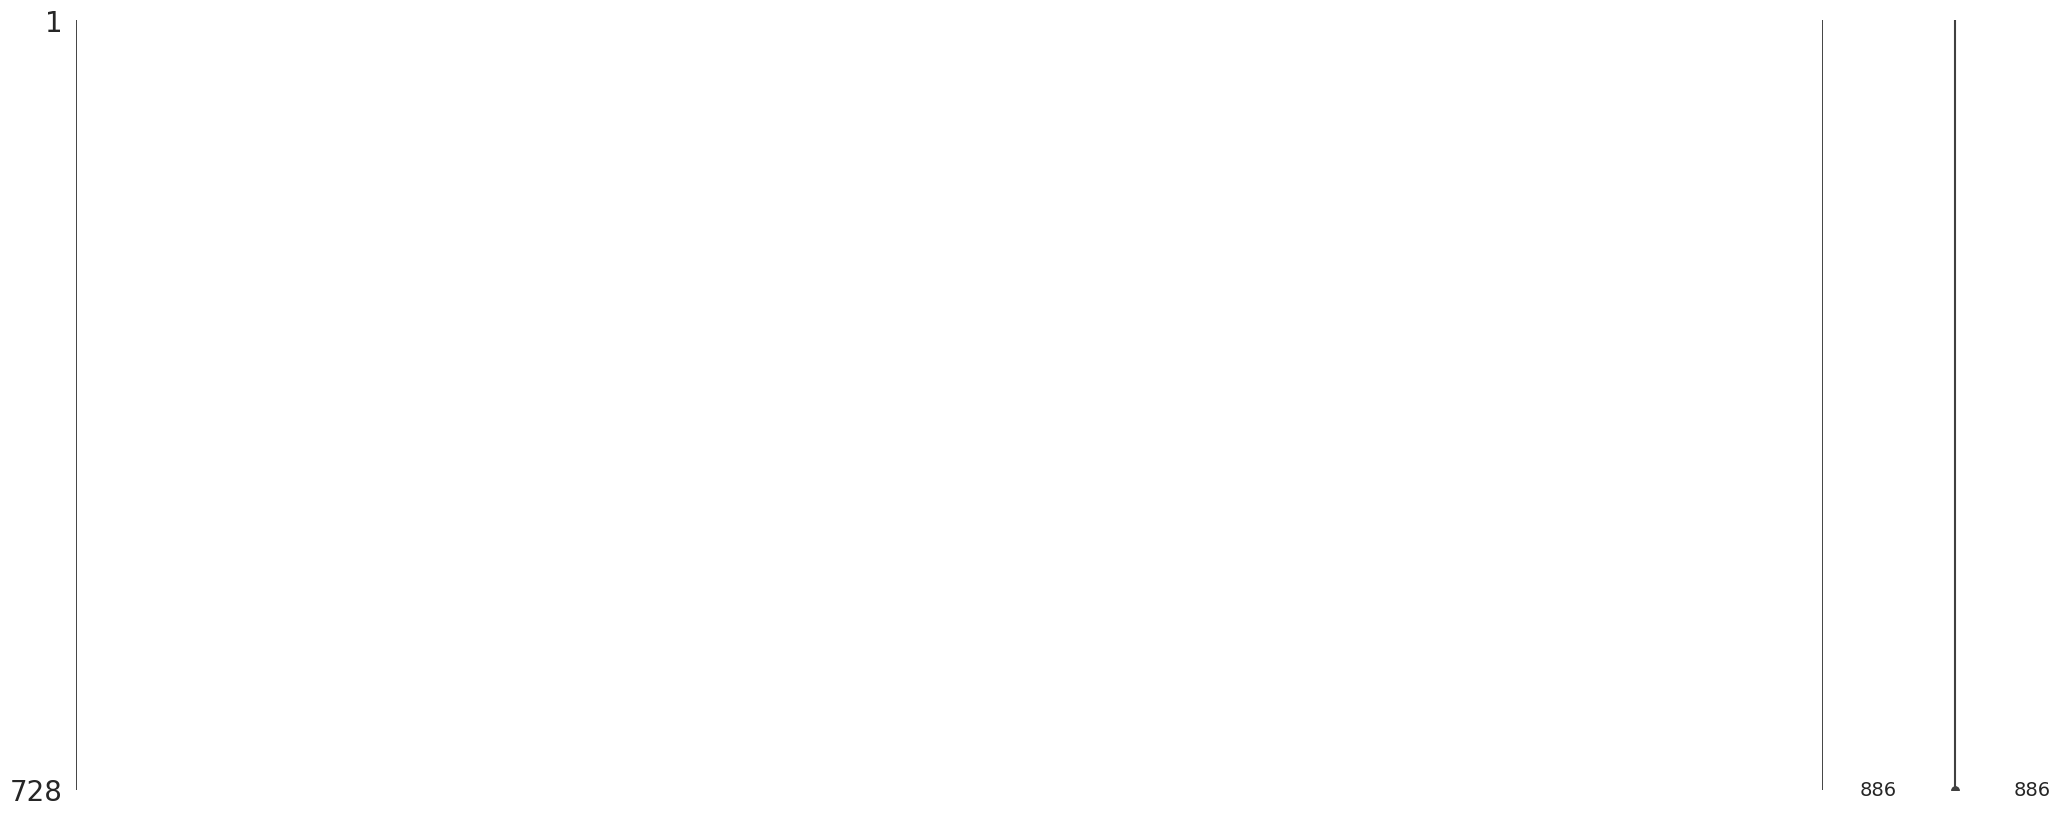

In [ ]:
msno.matrix(dataset)

### Mengecek low variance

In [ ]:
selection2= ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
lipinski = dataset [selection2]
lipinski.head()

,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,4.75,430.35,4.69,3.00,6.00
1,4.78,364.34,3.93,3.00,5.00
2,4.00,431.46,3.63,3.00,7.00
3,4.05,364.34,3.93,3.00,5.00
4,4.00,366.43,3.85,3.00,5.00


In [ ]:
variance = dataset.drop(columns= ['pIC50',  'MW', 'LogP', 'NumHDonors', 'NumHAcceptors'], axis=1)
variance.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
variance = selection.fit_transform(variance)
variance = pd.DataFrame(variance)
variance.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
153,0
154,0
155,0
156,0


In [ ]:
variance.columns = variance.columns.astype(str)

In [ ]:
fix = pd.concat([variance,lipinski], axis=1)
fix

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,0,1,1,0,1,0,0,1,1,1,...,0,1,0,0,0,4.75,430.35,4.69,3.00,6.00
1,0,1,1,0,1,0,0,1,1,1,...,0,1,0,0,0,4.78,364.34,3.93,3.00,5.00
2,0,1,1,0,1,0,0,1,1,1,...,0,1,0,0,0,4.00,431.46,3.63,3.00,7.00
3,1,1,1,0,0,0,0,1,1,1,...,0,1,0,0,0,4.05,364.34,3.93,3.00,5.00
4,1,1,1,0,0,0,0,1,1,1,...,0,1,0,0,0,4.00,366.43,3.85,3.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,7.31,475.86,5.31,4.00,6.00
724,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,6.46,459.41,4.80,4.00,6.00
725,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,7.30,407.87,4.29,4.00,6.00
726,1,1,0,0,0,0,0,1,1,1,...,0,0,0,0,0,7.28,388.44,4.14,2.00,8.00


<Axes: >

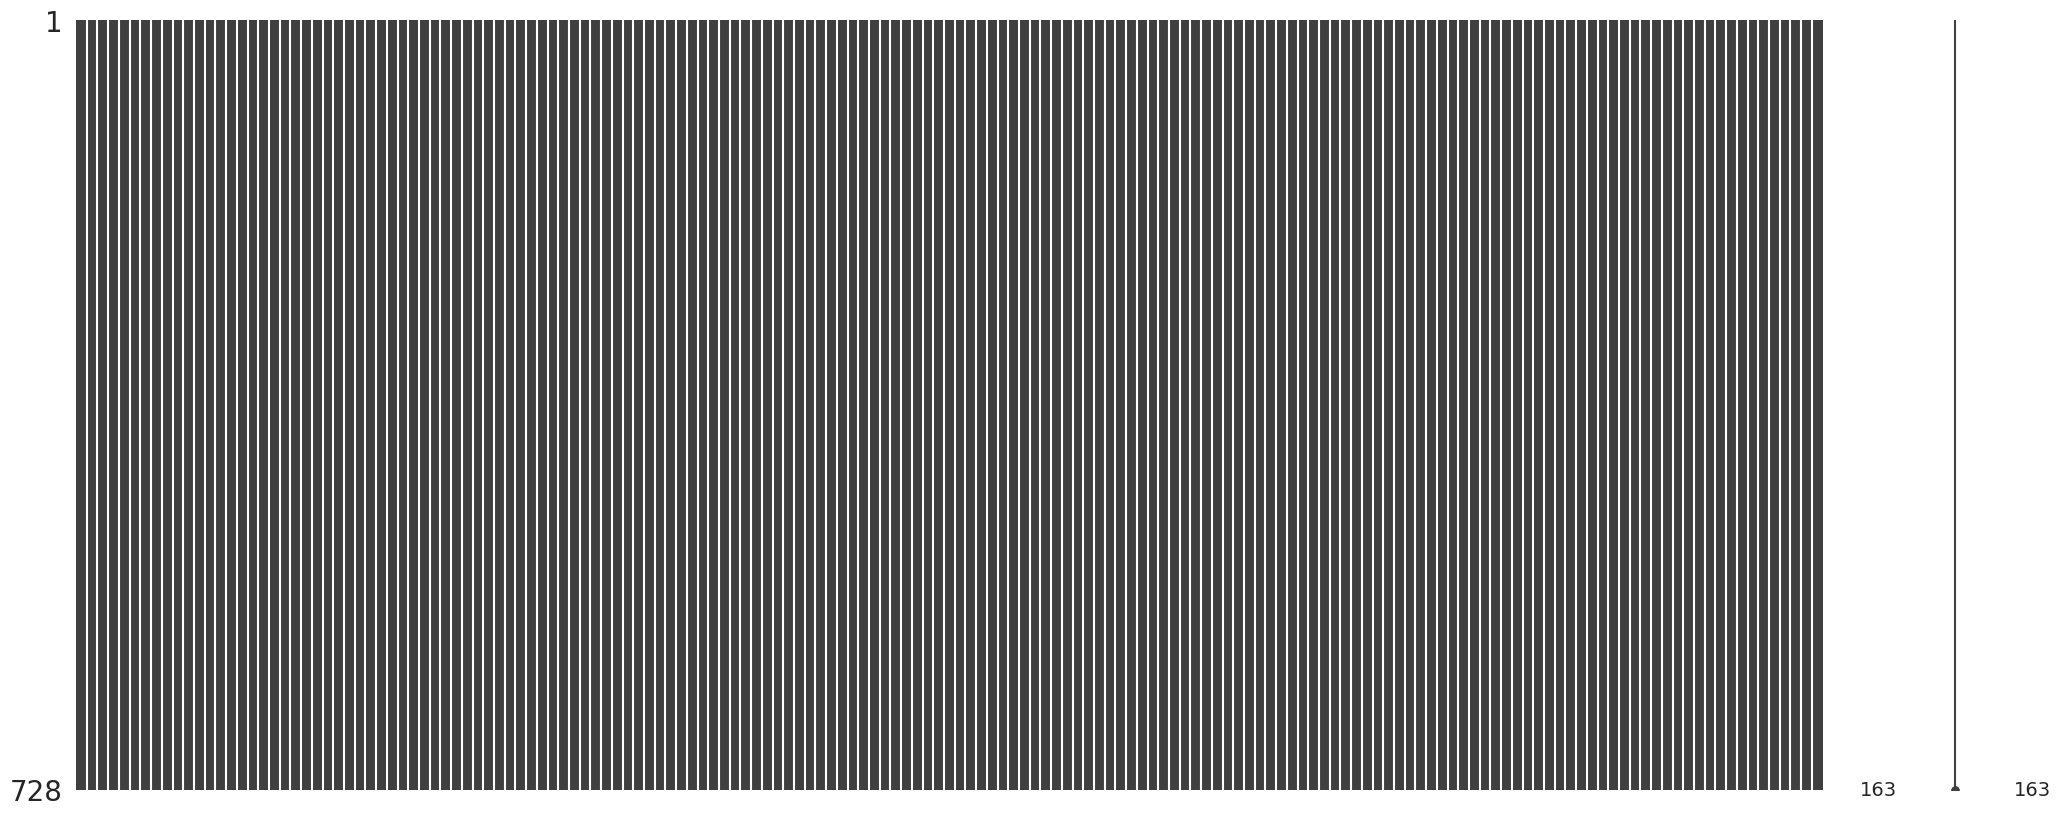

In [ ]:
msno.matrix(fix)

In [ ]:
fix=fix.dropna()
fix

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,0,1,1,0,1,0,0,1,1,1,...,0,1,0,0,0,4.75,430.35,4.69,3.00,6.00
1,0,1,1,0,1,0,0,1,1,1,...,0,1,0,0,0,4.78,364.34,3.93,3.00,5.00
2,0,1,1,0,1,0,0,1,1,1,...,0,1,0,0,0,4.00,431.46,3.63,3.00,7.00
3,1,1,1,0,0,0,0,1,1,1,...,0,1,0,0,0,4.05,364.34,3.93,3.00,5.00
4,1,1,1,0,0,0,0,1,1,1,...,0,1,0,0,0,4.00,366.43,3.85,3.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,7.31,475.86,5.31,4.00,6.00
724,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,6.46,459.41,4.80,4.00,6.00
725,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,7.30,407.87,4.29,4.00,6.00
726,1,1,0,0,0,0,0,1,1,1,...,0,0,0,0,0,7.28,388.44,4.14,2.00,8.00


In [ ]:
fix.to_csv('02_dataset_model_sars.csv', index=False)